<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2008%20-%20Heat%20Equations/803_Heat%20Equation-Crank_Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Implicit Crank-Nicolson Difference Equation for the Heat Equation

#### John S Butler john.s.butler@tudublin.ie   [Course Notes](https://johnsbutler.netlify.com/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf)    [Github](https://github.com/john-s-butler-dit/Numerical-Analysis-Python)
## Overview
This notebook will illustrate the Crank-Nicolson Difference method for the Heat Equation.
## The Heat Equation
The Heat Equation is the first order in time ($t$) and second order in space ($x$) Partial Differential Equation: 
\begin{equation}  \frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2},\end{equation}
The equation describes heat transfer on a domain
\begin{equation} \Omega = \{ t \geq, 0\leq x \leq 1\}. \end{equation}
with an initial condition at time $t=0$ for all $x$ and boundary condition on the left ($x=0$) and right side 

This notebook will illustrate the Crank-Nicolson Difference method for the Heat Equation with the __initial conditions__  
\begin{equation} u(x,0)=2x, \ \ 0 \leq x \leq \frac{1}{2}, \end{equation}
\begin{equation} u(x,0)=2(1-x), \ \ \frac{1}{2}  \leq x \leq 1, \end{equation}
and __boundary condition__
\begin{equation} u(0,t)=0,  u(1,t)=0. \end{equation}
## Crank-Nicolson Difference method

The implicit Crank-Nicolson difference equation of the Heat Equation
is derived by discretising the
\begin{equation}  \frac{\partial u_{ij+\frac{1}{2}}}{\partial t} = \frac{\partial^2 u_{ij+\frac{1}{2}}}{\partial x^2},\end{equation}
around $(x_i,t_{j+\frac{1}{2}})$ giving the difference equation
\begin{equation}
\frac{w_{ij+1}-w_{ij}}{k}=\frac{1}{2}\left(\frac{w_{i+1j+1}-2w_{ij+1}+w_{i-1j+1}}{h^2}+\frac{w_{i+1j}-2w_{ij}+w_{i-1j}}{h^2}\right).
\end{equation}
Rearranging give the difference equation 
\begin{equation}
-rw_{i-1j+1}+(2+2r)w_{ij+1}-rw_{i+1j+1}=rw_{i-1j}+(2-2r)w_{ij}+rw_{i+1j}
\end{equation}
for $i=1,...9$ where $r=\frac{k}{h^2}$.



In [1]:
# LIBRARY
# vector manipulation
import numpy as np
# math functions
import math 

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")


## Discete Grid
The region $\Omega$ is discretised into a uniform mesh $\Omega_h$. In the space $x$ direction into $N$ steps giving a stepsize of
\begin{equation} h=\frac{1-0}{N},\end{equation}
resulting in 
\begin{equation}x[i]=0+ih, \ \ \  i=0,1,...,N,\end{equation}
and into $N_t$ steps in the time $t$ direction giving a stepsize of 
\begin{equation} k=\frac{1-0}{N_t}\end{equation}
resulting in 
\begin{equation}t[i]=0+ik, \ \ \ k=0,...,K.\end{equation}
The Figure below shows the discrete grid points for $N=10$ and $N_t=100$ , the red dots are the unknown values, the green dots are the known boundary conditions and the blue dots are the known initial conditions of the Heat Equation.

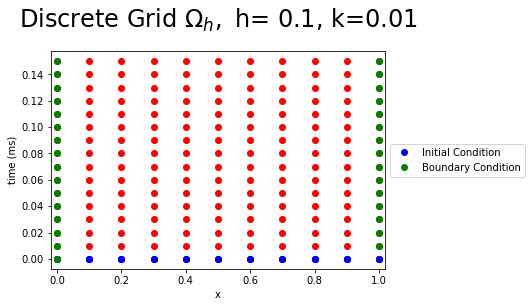

In [2]:
N=10
Nt=100
h=1/N
k=1/Nt
r=k/(h*h)
time_steps=15
time=np.arange(0,(time_steps+.5)*k,k)
x=np.arange(0,1.0001,h)
X, Y = np.meshgrid(x, time)
fig = plt.figure()
plt.plot(X,Y,'ro');
plt.plot(x,0*x,'bo',label='Initial Condition');
plt.plot(np.ones(time_steps+1),time,'go',label='Boundary Condition');
plt.plot(x,0*x,'bo');
plt.plot(0*time,time,'go');
plt.xlim((-0.02,1.02))
plt.xlabel('x')
plt.ylabel('time (ms)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Discrete Grid $\Omega_h,$ h= %s, k=%s'%(h,k),fontsize=24,y=1.08)
plt.show();

## Discrete Initial and Boundary Conditions

The discrete initial conditions are 
\begin{equation} w[i,0]=2x[i], \ \ 0 \leq x[i] \leq \frac{1}{2} \end{equation}
\begin{equation} w[i,0]=2(1-x[i]), \ \ \frac{1}{2}  \leq x[i] \leq 1 \end{equation}
and the discete boundary conditions are 
\begin{equation} w[0,j]=0,  w[10,j]=0, \end{equation}
where $w[i,j]$ is the numerical approximation of $U(x[i],t[j])$.

The Figure below plots values of $w[i,0]$ for the inital (blue) and boundary (red) conditions for $t[0]=0.$

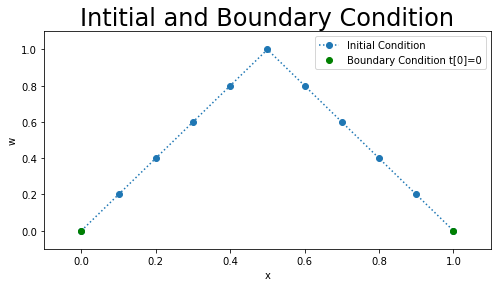

In [3]:
w=np.zeros((N+1,time_steps+1))
b=np.zeros(N-1)
# Initial Condition
for i in range (1,N):
    w[i,0]=2*x[i]
    if x[i]>0.5:
        w[i,0]=2*(1-x[i])
    

# Boundary Condition
for k in range (0,time_steps):
    w[0,k]=0
    w[N,k]=0

fig = plt.figure(figsize=(8,4))
plt.plot(x,w[:,0],'o:',label='Initial Condition')
plt.plot(x[[0,N]],w[[0,N],0],'go',label='Boundary Condition t[0]=0')
#plt.plot(x[N],w[N,0],'go')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Intitial and Boundary Condition',fontsize=24)
plt.xlabel('x')
plt.ylabel('w')
plt.legend(loc='best')
plt.show()

## The Implicit Crank-Nicolson Difference Equation
The implicit Crank-Nicolson difference equation of the Heat Equation
is derived by discretising the
\begin{equation}  \frac{\partial u_{ij+\frac{1}{2}}}{\partial t} = \frac{\partial^2 u_{ij+\frac{1}{2}}}{\partial x^2},\end{equation}
around $(x_i,t_{j+\frac{1}{2}})$ giving the difference equation
\begin{equation}
\frac{w_{ij+1}-w_{ij}}{k}=\frac{1}{2}\left(\frac{w_{i+1j+1}-2w_{ij+1}+w_{i-1j+1}}{h^2}+\frac{w_{i+1j}-2w_{ij}+w_{i-1j}}{h^2}\right)
\end{equation}
Rearranging the equation we get
\begin{equation}
-rw_{i-1j+1}+(2+2r)w_{ij+1}-rw_{i+1j+1}=rw_{i-1j}+(2-2r)w_{ij}+rw_{i+1j}
\end{equation}
for $i=1,...9$ where $r=\frac{k}{h^2}$.

This gives the formula for the unknown term $w_{ij+1}$ at the $(ij+1)$ mesh points
in terms of $x[i]$ along the jth time row.

Hence we can calculate the unknown pivotal values of $w$ along the first row of $j=1$ in terms of the known boundary conditions.

This can be written in matrix form 
\begin{equation} A\mathbf{w}_{j+1}=B\mathbf{w}_{j} +\mathbf{b}_{j}+\mathbf{b}_{j+1} \end{equation}
for which $A$ is a $9\times9$ matrix:
\begin{equation}
\left(\begin{array}{cccc cccc}
2+2r&-r& 0&0&0 &0&0&0\\
-r&2+2r&-r&0&0&0 &0&0&0\\
0&-r&2+2r &-r&0&0& 0&0&0\\
0&0&-r&2+2r &-r&0&0& 0&0\\
0&0&0&-r&2+2r &-r&0&0& 0\\
0&0&0&0&-r&2+2r &-r&0&0\\
0&0&0&0&0&-r&2+2r &-r&0\\
0&0&0&0&0&0&-r&2+2r&-r\\
0&0&0&0&0&0&0&-r&2+2r\\
\end{array}\right)
\left(\begin{array}{c}
w_{1j+1}\\
w_{2j+1}\\
w_{3j+1}\\
w_{4j+1}\\
w_{5j+1}\\
w_{6j+1}\\
w_{7j+1}\\
w_{8j+1}\\
w_{9j+1}\\
\end{array}\right)=
\left(\begin{array}{cccc cccc}
2-2r&r& 0&0&0 &0&0&0\\
r&2-2r&r&0&0&0 &0&0&0\\
0&r&2-2r &r&0&0& 0&0&0\\
0&0&r&2-2r &r&0&0& 0&0\\
0&0&0&r&2-2r &r&0&0& 0\\
0&0&0&0&r&2-2r &r&0&0\\
0&0&0&0&0&r&2-2r &r&0\\
0&0&0&0&0&0&r&2-2r&r\\
0&0&0&0&0&0&0&r&2-2r\\
\end{array}\right)
\left(\begin{array}{c}
w_{1j}\\
w_{2j}\\
w_{3j}\\
w_{4j}\\
w_{5j}\\
w_{6j}\\
w_{7j}\\
w_{8j}\\
w_{9j}\\
\end{array}\right)+
\left(\begin{array}{c}
rw_{0j}\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
rw_{10j}\\
\end{array}\right)+
\left(\begin{array}{c}
rw_{0j+1}\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
rw_{10j+1}\\
\end{array}\right).
\end{equation}
It is assumed that the boundary values $w_{0j}$ and $w_{10j}$ are known for $j=1,2,...$, and $w_{i0}$ for $i=0,...,10$ is the initial condition.

The Figure below shows the values of the $9\times 9$  matrix in colour plot form for $r=\frac{k}{h^2}$.

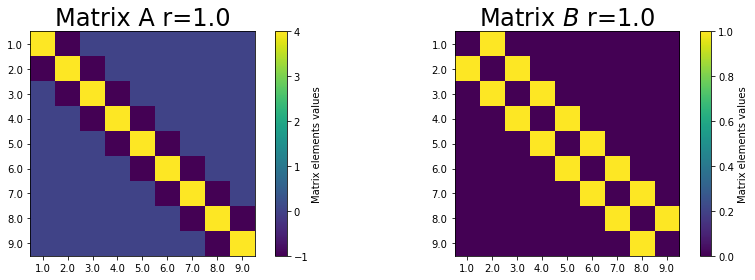

In [4]:
A=np.zeros((N-1,N-1))
B=np.zeros((N-1,N-1))
for i in range (0,N-1):
    A[i,i]=2+2*r
    B[i,i]=2-2*r

for i in range (0,N-2):           
    A[i+1,i]=-r
    A[i,i+1]=-r
    B[i+1,i]=r
    B[i,i+1]=r
    
Ainv=np.linalg.inv(A)   
fig = plt.figure(figsize=(12,4));
plt.subplot(121)
plt.imshow(A,interpolation='none');
plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1));
plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1));
clb=plt.colorbar();
clb.set_label('Matrix elements values');
#clb.set_clim((-1,1));
plt.title('Matrix A r=%s'%(np.round(r,3)),fontsize=24)

plt.subplot(122)
plt.imshow(B,interpolation='none');
plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1));
plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1));
clb=plt.colorbar();
clb.set_label('Matrix elements values');
#clb.set_clim((-1,1));
plt.title(r'Matrix $B$ r=%s'%(np.round(r,3)),fontsize=24)
fig.tight_layout()
plt.show();

## Results
To numerically approximate the solution at $t[1]$ the matrix equation becomes 
\begin{equation} \mathbf{w}_{1}=A^{-1}(B\mathbf{w}_{0} +\mathbf{b}_{1}+\mathbf{b}_{0}) \end{equation}
where all the right hand side is known. 
To approximate solution at time $t[2]$ we use the matrix equation
\begin{equation}\mathbf{w}_{2}=A^{-1}(B\mathbf{w}_{1}+\mathbf{b}_{2} +\mathbf{b}_{1}). \end{equation}
Each set of numerical solutions $w[i,j]$ for all $i$ at the previous time step is used to approximate the solution $w[i,j+1]$. 
The left and right plot below show the numerical approximation $w[i,j]$ of the Heat Equation using the Crank-Nicolson method for $x[i]$ for $i=0,...,10$ and time steps $t[j]$ for $j=1,...,15$.

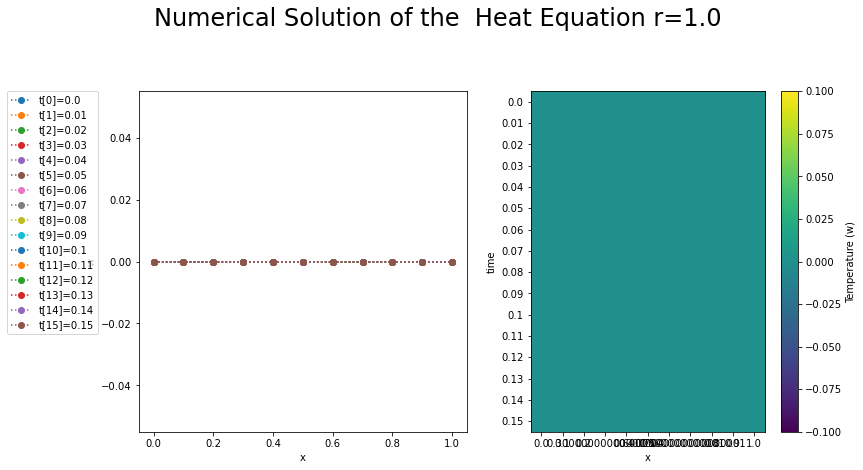

In [5]:
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
for j in range (0,time_steps+1):
    b[0]=r*w[0,j-1]+r*w[0,j]
    b[N-2]=r*w[N,j-1]+r*w[N,j]
    v=np.dot(B,w[1:(N),j-1])
    w[1:(N),j]=np.dot(Ainv,v+b)
    plt.plot(x,w[:,j],'o:',label='t[%s]=%s'%(j,time[j]))
plt.xlabel('x')
plt.ylabel('w')
#plt.legend(loc='bottom', bbox_to_anchor=(0.5, -0.1))
plt.legend(bbox_to_anchor=(-.4, 1), loc=2, borderaxespad=0.)

plt.subplot(122)
plt.imshow(w.transpose())
plt.xticks(np.arange(len(x)), x)
plt.yticks(np.arange(len(time)), time)
plt.xlabel('x')
plt.ylabel('time')
clb=plt.colorbar()
clb.set_label('Temperature (w)')
plt.suptitle('Numerical Solution of the  Heat Equation r=%s'%(np.round(r,3)),fontsize=24,y=1.08)
fig.tight_layout()
plt.show()

## Local Trunction Error
The local truncation error of the Crank-Nicoloson we approximate 
\begin{equation}
\frac{\partial U}{\partial t} - \frac{\partial^2 U}{\partial x^2}=0,
\end{equation} 
with

\begin{equation}
F_{ij+\frac{1}{2}}(w)=\frac{w_{ij+1}-w_{ij}}{k}-\frac{1}{2}\left(\frac{w_{i+1j}-2w_{ij}+w_{i-1j}}{h^2}
+\frac{w_{i+1j+1}-2w_{ij+1}+w_{i-1j+1}}{h^2}
\right)=0.\end{equation} 
Subbing the exact answer into the difference equation gives the truncation error
\begin{equation}
T_{ij+\frac{1}{2}}=F_{ij+\frac{1}{2}}(U)=\frac{U_{ij+1}-U_{ij}}{k}-\frac{1}{2}\left(\frac{U_{i+1j}-2U_{ij}+U_{i-1j}}{h^2}+\frac{U_{i+1j+1}-2U_{ij+1}+U_{i-1j+1}}{h^2}\right),
\end{equation}
simplify
\begin{equation}
U_{ij+\frac{1}{2}}=\frac{U_{ij+1}+U_{ij}}{2},
\end{equation}
substitute into equation
\begin{equation}
T_{ij+\frac{1}{2}}=F_{ij+\frac{1}{2}}(U)=\frac{U_{ij+1}-U_{ij}}{k}-\frac{U_{i+1j+\frac{1}{2}}-2U_{ij+\frac{1}{2}}+U_{i-1j+\frac{1}{2}}}{h^2},
\end{equation} 
By Taylors expansions we have
\begin{eqnarray*}
U_{i+1j+\frac{1}{2}}&=&U((i+1)h,(j+\frac{1}{2})k)=U(x_i+h,t_j+\frac{1}{2}k)\\
&=&U_{ij+\frac{1}{2}}+h\left(\frac{\partial U}{\partial x} \right)_{ij+\frac{1}{2}}+\frac{h^2}{2}\left(\frac{\partial^2 U}{\partial x^2} \right)_{ij+\frac{1}{2}}+\frac{h^3}{6}\left(\frac{\partial^3 U}{\partial x^3} \right)_{ij+\frac{1}{2}} +...\\
U_{i-1j+\frac{1}{2}}&=&U((i-1)h,(j+\frac{1}{2})k)=U(x_i-h,t_j+\frac{1}{2}k)\\
&=&U_{ij+\frac{1}{2}}-h\left(\frac{\partial U}{\partial x} \right)_{ij+\frac{1}{2}}+\frac{h^2}{2}\left(\frac{\partial^2 U}{\partial x^2} \right)_{ij+\frac{1}{2}}-\frac{h^3}{6}\left(\frac{\partial^3 U}{\partial x^3} \right)_{ij+\frac{1}{2}} +...\\
U_{ij+1}&=&U(ih,(j+1)k)=U(x_i,t_j+k)\\
&=&U_{ij+\frac{1}{2}}+\frac{k}{2}\left(\frac{\partial U}{\partial t} \right)_{ij+\frac{1}{2}}+\frac{(\frac{k}{2})^2}{2}\left(\frac{\partial^2 U}{\partial t^2} \right)_{ij+\frac{1}{2}}+\frac{(\frac{k}{2})^3}{6}\left(\frac{\partial^3 U}{\partial t^3} \right)_{ij+\frac{1}{2}} +...\\
U_{ij-1}&=&U(ih,(j-1)k)=U(x_i,t_j-k)\\
&=&U_{ij+\frac{1}{2}}-\frac{k}{2}\left(\frac{\partial U}{\partial t} \right)_{ij+\frac{1}{2}}+\frac{(\frac{k}{2})^2}{2}\left(\frac{\partial^2 U}{\partial t^2} \right)_{ij+\frac{1}{2}}-\frac{(\frac{k}{2})^3}{6}\left(\frac{\partial^3 U}{\partial t^3} \right)_{ij+\frac{1}{2}} +...
\end{eqnarray*}

substitution into the expression for $T_{ij+\frac{1}{2}}$ then gives

\begin{eqnarray*}
T_{ij+\frac{1}{2}}&=&\left(\frac{\partial U}{\partial t} - \frac{\partial^2 U}{\partial x^2} \right)_{ij+\frac{1}{2}}
-\frac{h^2}{12}\left(\frac{\partial^4 U}{\partial x^4} \right)_{ij+\frac{1}{2}}\\
& &	+\frac{k^2}{24}\left(\frac{\partial^3 U}{\partial t^3} \right)_{ij+\frac{1}{2}}
-\frac{h^4}{360}\left(\frac{\partial^6 U}{\partial x^6} \right)_{ij+\frac{1}{2}}+ ...
\end{eqnarray*}
But $U$ is the solution to the differential equation so
\begin{equation} \left(\frac{\partial U}{\partial t} - \frac{\partial^2 U}{\partial x^2} \right)_{ij+\frac{1}{2}}=0,\end{equation} 

the principal part of the local truncation error is 

\begin{equation}
\frac{k^2}{24}\left(\frac{\partial^3 U}{\partial t^3} \right)_{ij+\frac{1}{2}}-\frac{h^2}{12}\left(\frac{\partial^4 U}{\partial x^4} \right)_{ij+\frac{1}{2}}.
\end{equation} 



Hence the truncation error is
\begin{equation} 
T_{ij}=O(k^2)+O(h^2).
\end{equation} 





## Stability Analyis 

To investigating the stability of the fully implicit Crank Nicolson difference method of the Heat Equation, we will use the von Neumann method.
The difference equation is:
\begin{equation}\frac{1}{k}(w_{pq+1}-w_{pq})=\frac{1}{2}\left(\frac{1}{h_x^2}(w_{p-1q+1}-2w_{pq+1}+w_{p+1q+1})+\frac{1}{h_x^2}(w_{p-1q}-2w_{pq}+w_{p+1q})\right),\end{equation}
approximating 
\begin{equation}\frac{\partial U}{\partial t}=\frac{\partial^2 U}{\partial x^2}\end{equation}

at $(ph,(q+\frac{1}{2})k)$. Substituting $w_{pq}=e^{i\beta x}\xi^{q}$ into the difference equation gives: 
\begin{equation}e^{i\beta ph}\xi^{q+1}-e^{i\beta ph}\xi^{q}=\frac{1}{2}\left(r\{e^{i\beta (p-1)h}\xi^{q+1}-2e^{i\beta ph}\xi^{q+1}+e^{i\beta (p+1)h}\xi^{q+1}+e^{i\beta (p-1)h}\xi^{q}-2e^{i\beta ph}\xi^{q}+e^{i\beta (p+1)h}\xi^{q} \right) \}
\end{equation}

where $r=\frac{k}{h_x^2}$. Divide across by $e^{i\beta (p)h}\xi^{q}$ leads to

\begin{equation} \xi-1=r \xi (e^{i\beta (-1)h} -2+e^{i\beta h})+r (e^{i\beta (-1)h} -2+e^{i\beta h}), \end{equation}

\begin{equation}\xi-\xi r (2\cos(\beta h)-2)= 1+r (2\cos(\beta h)-2),\end{equation}

\begin{equation}\xi(1+4r\sin^2(\beta\frac{h}{2})) =1-4r\sin^2(\beta\frac{h}{2})\end{equation}
Hence 
\begin{equation}\xi=\frac{1-4r\sin^2(\beta\frac{h}{2})}{(1+4r\sin^2(\beta\frac{h}{2}))} \leq 1\end{equation}
therefore the equation is unconditionally stable as $0 < \xi \leq 1$ for all $r$ and all $\beta$ .



## References
[1] G D Smith Numerical Solution of Partial Differential Equations: Finite Difference Method Oxford 1992

[2] Butler, J. (2019). John S Butler Numerical Methods for Differential Equations. [online] Maths.dit.ie. Available at: http://www.maths.dit.ie/~johnbutler/Teaching_NumericalMethods.html [Accessed 14 Mar. 2019].

[3] Wikipedia contributors. (2019, February 22). Heat equation. In Wikipedia, The Free Encyclopedia. Available at: https://en.wikipedia.org/w/index.php?title=Heat_equation&oldid=884580138 [Accessed 14 Mar. 2019].


